In [2]:
import numpy as np

import wf_psf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap
import seaborn as sns


In [3]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

# Pre-defined colormap
top = mpl.cm.get_cmap('Oranges_r', 128)
bottom = mpl.cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [4]:
metrics_file = '../wf-outputs-per-star/metrics/metrics-poly_interp_{}_bins.npy'

saving_folder ='../wf-outputs-per-star/plots/'

In [5]:
n_bins_list = [8, 16, 32]

metrics_dict_list = [np.load(metrics_file.format(n_bins), allow_pickle=True)[()] for n_bins in n_bins_list]


In [6]:
pix_rmse, pix_std_rmse, pix_rel_rmse, pix_std_rel_rmse = wf_psf.script_utils.extract_shape_pix_results(metrics_dict_list)

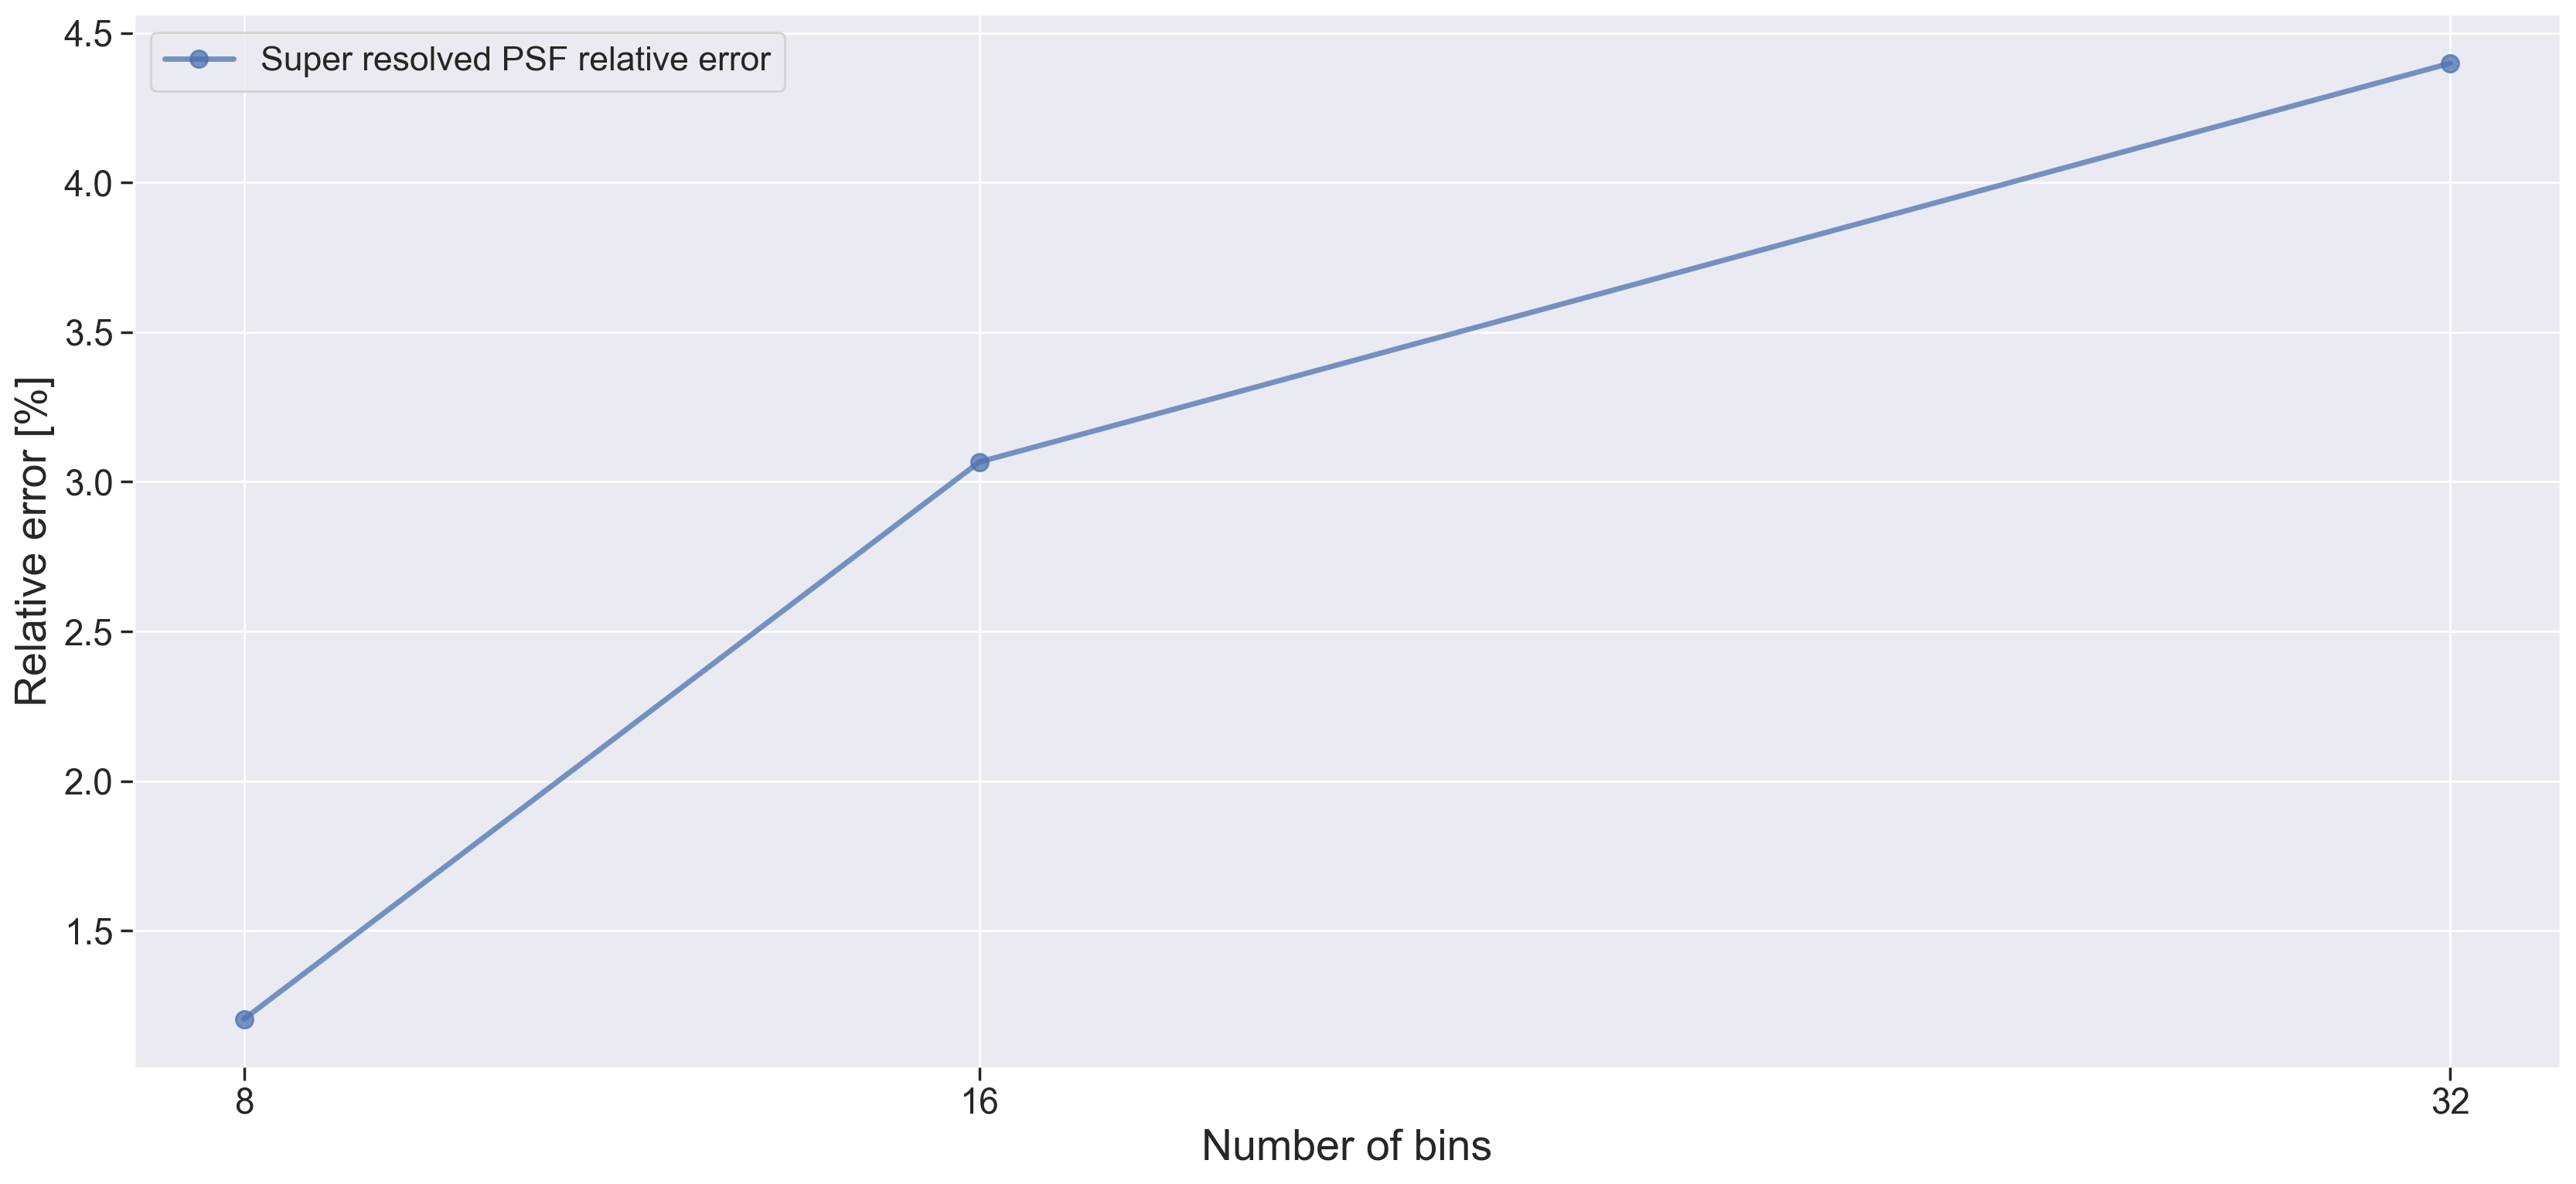

In [7]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(n_bins_list, pix_rel_rmse, label='Super resolved PSF relative error', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_bins_list)

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.set_xlabel('Number of bins', fontsize = 20)


#plt.savefig(saving_folder + 'SR_PSF_RMSE_vs_interpolated_Nb_bins.pdf')
plt.show()

In [8]:
euclid_rmse, euclid_std_rmse, euclid_rel_rmse, euclid_std_rel_rmse = wf_psf.script_utils.extract_poly_results(metrics_dict_list)


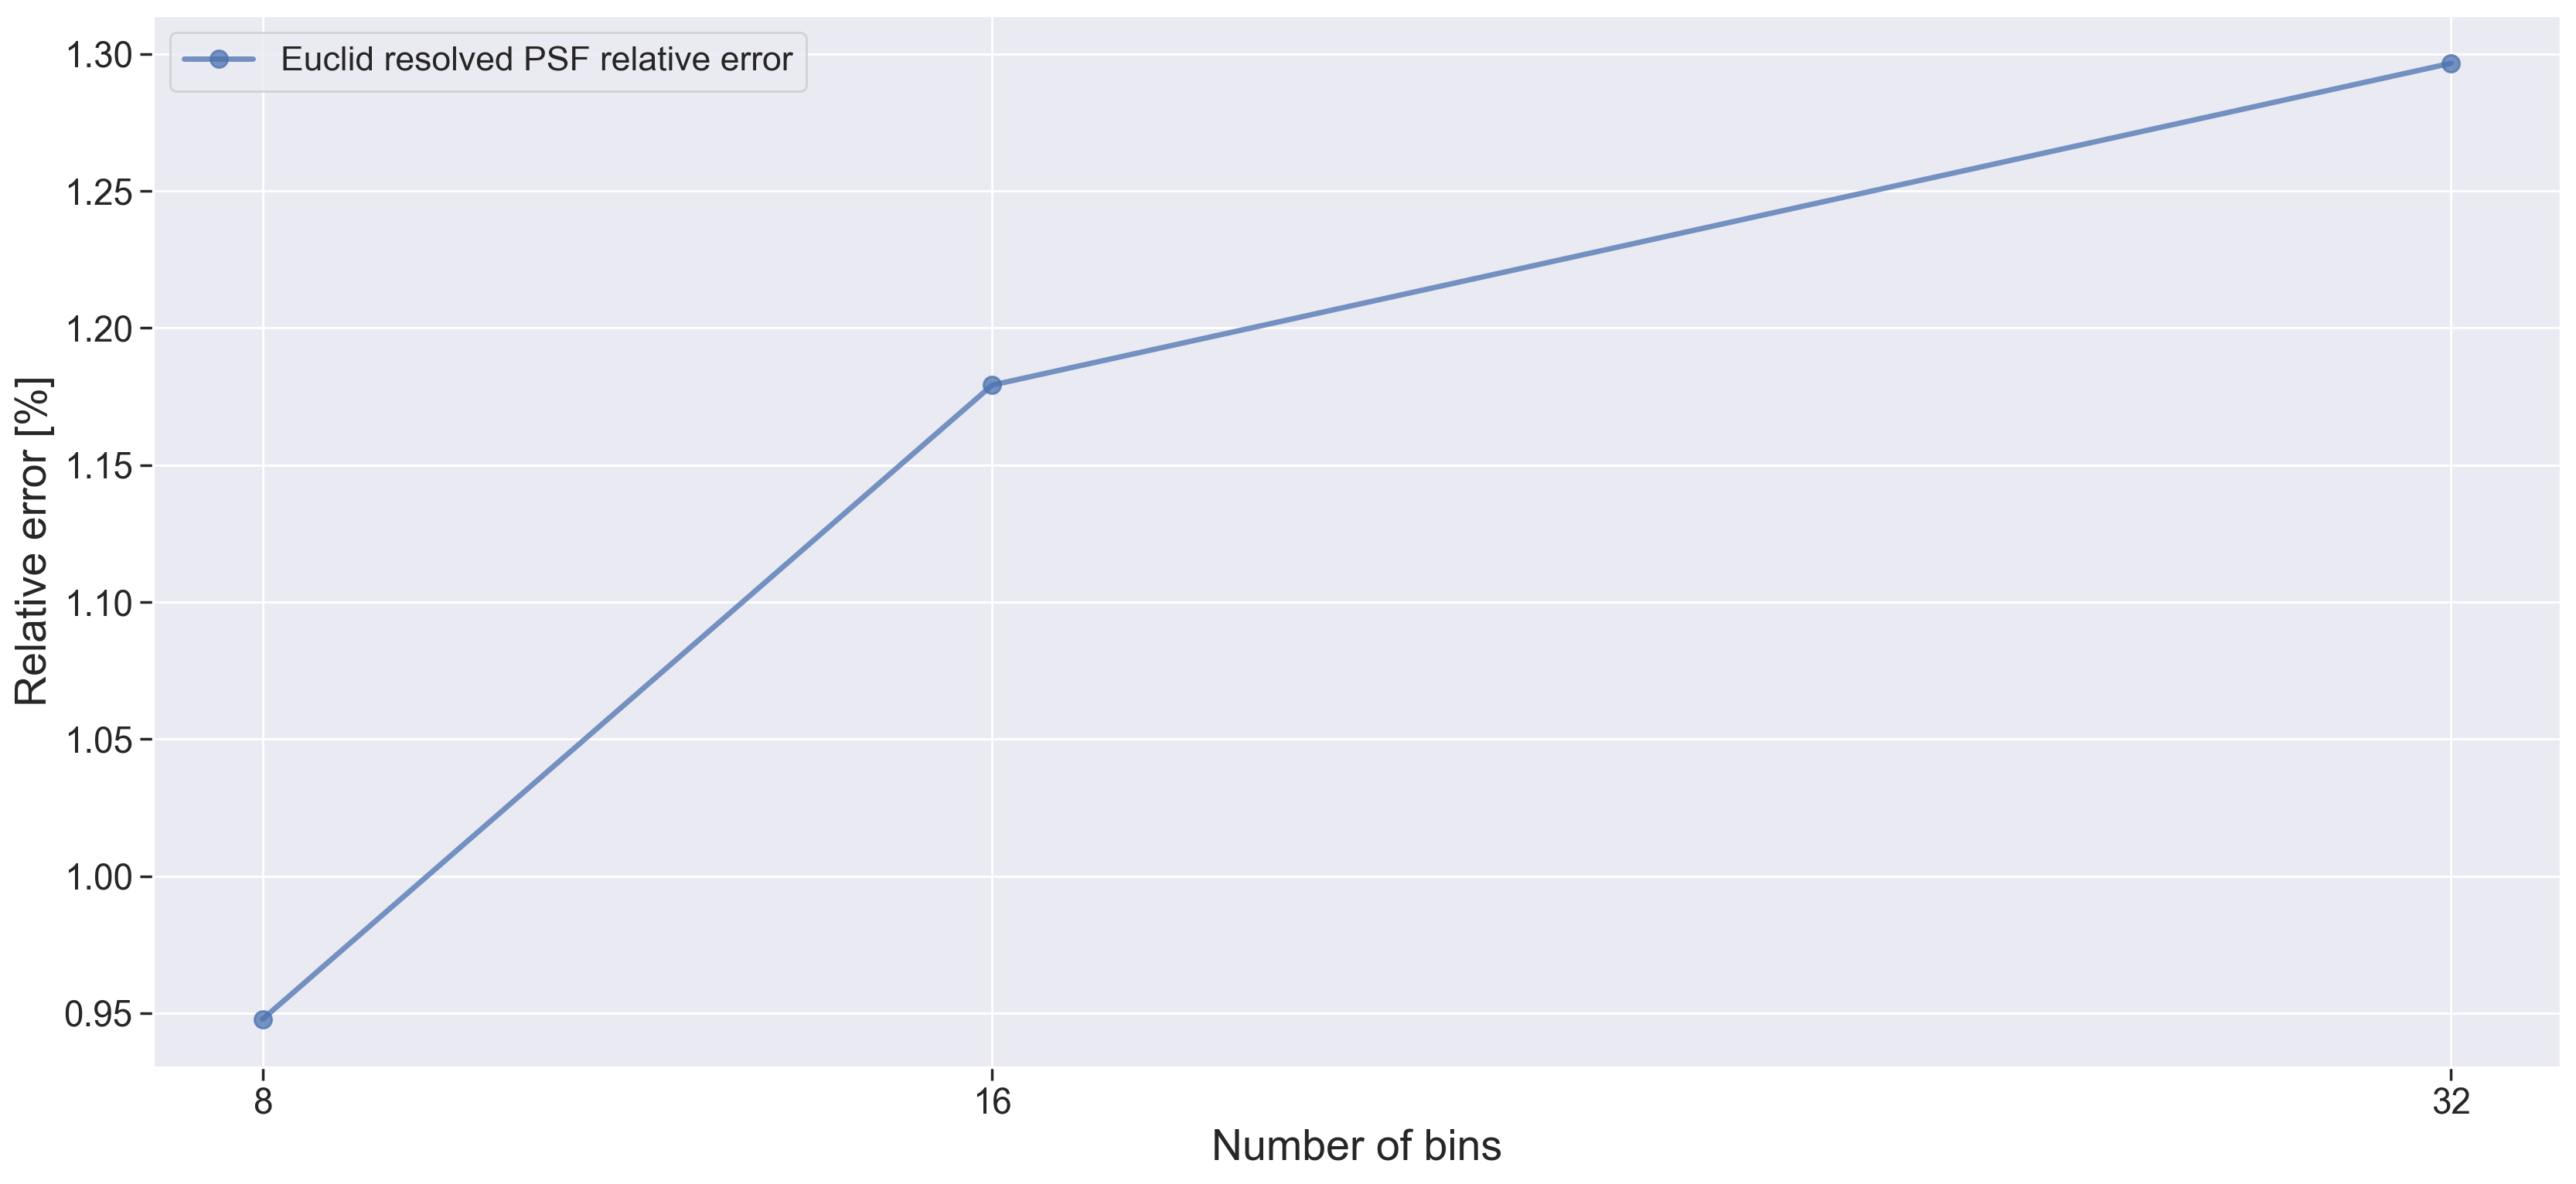

In [9]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(n_bins_list, euclid_rel_rmse, label='Euclid resolved PSF relative error', **kwargs)


ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_bins_list)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()

ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.set_xlabel('Number of bins', fontsize = 20)


#plt.savefig(saving_folder + 'ER_PSF_RMSE_vs_interpolated_Nb_bins.pdf')
plt.show()

# Error distribution

In [16]:
stars_rel_pix_rmse_8 = metrics_dict_list[0]['test_metrics']['shape_results_dict']['stars_rel_pix_rmse']
stars_rel_pix_rmse_16 = metrics_dict_list[1]['test_metrics']['shape_results_dict']['stars_rel_pix_rmse']
stars_rel_pix_rmse_32 = metrics_dict_list[2]['test_metrics']['shape_results_dict']['stars_rel_pix_rmse']

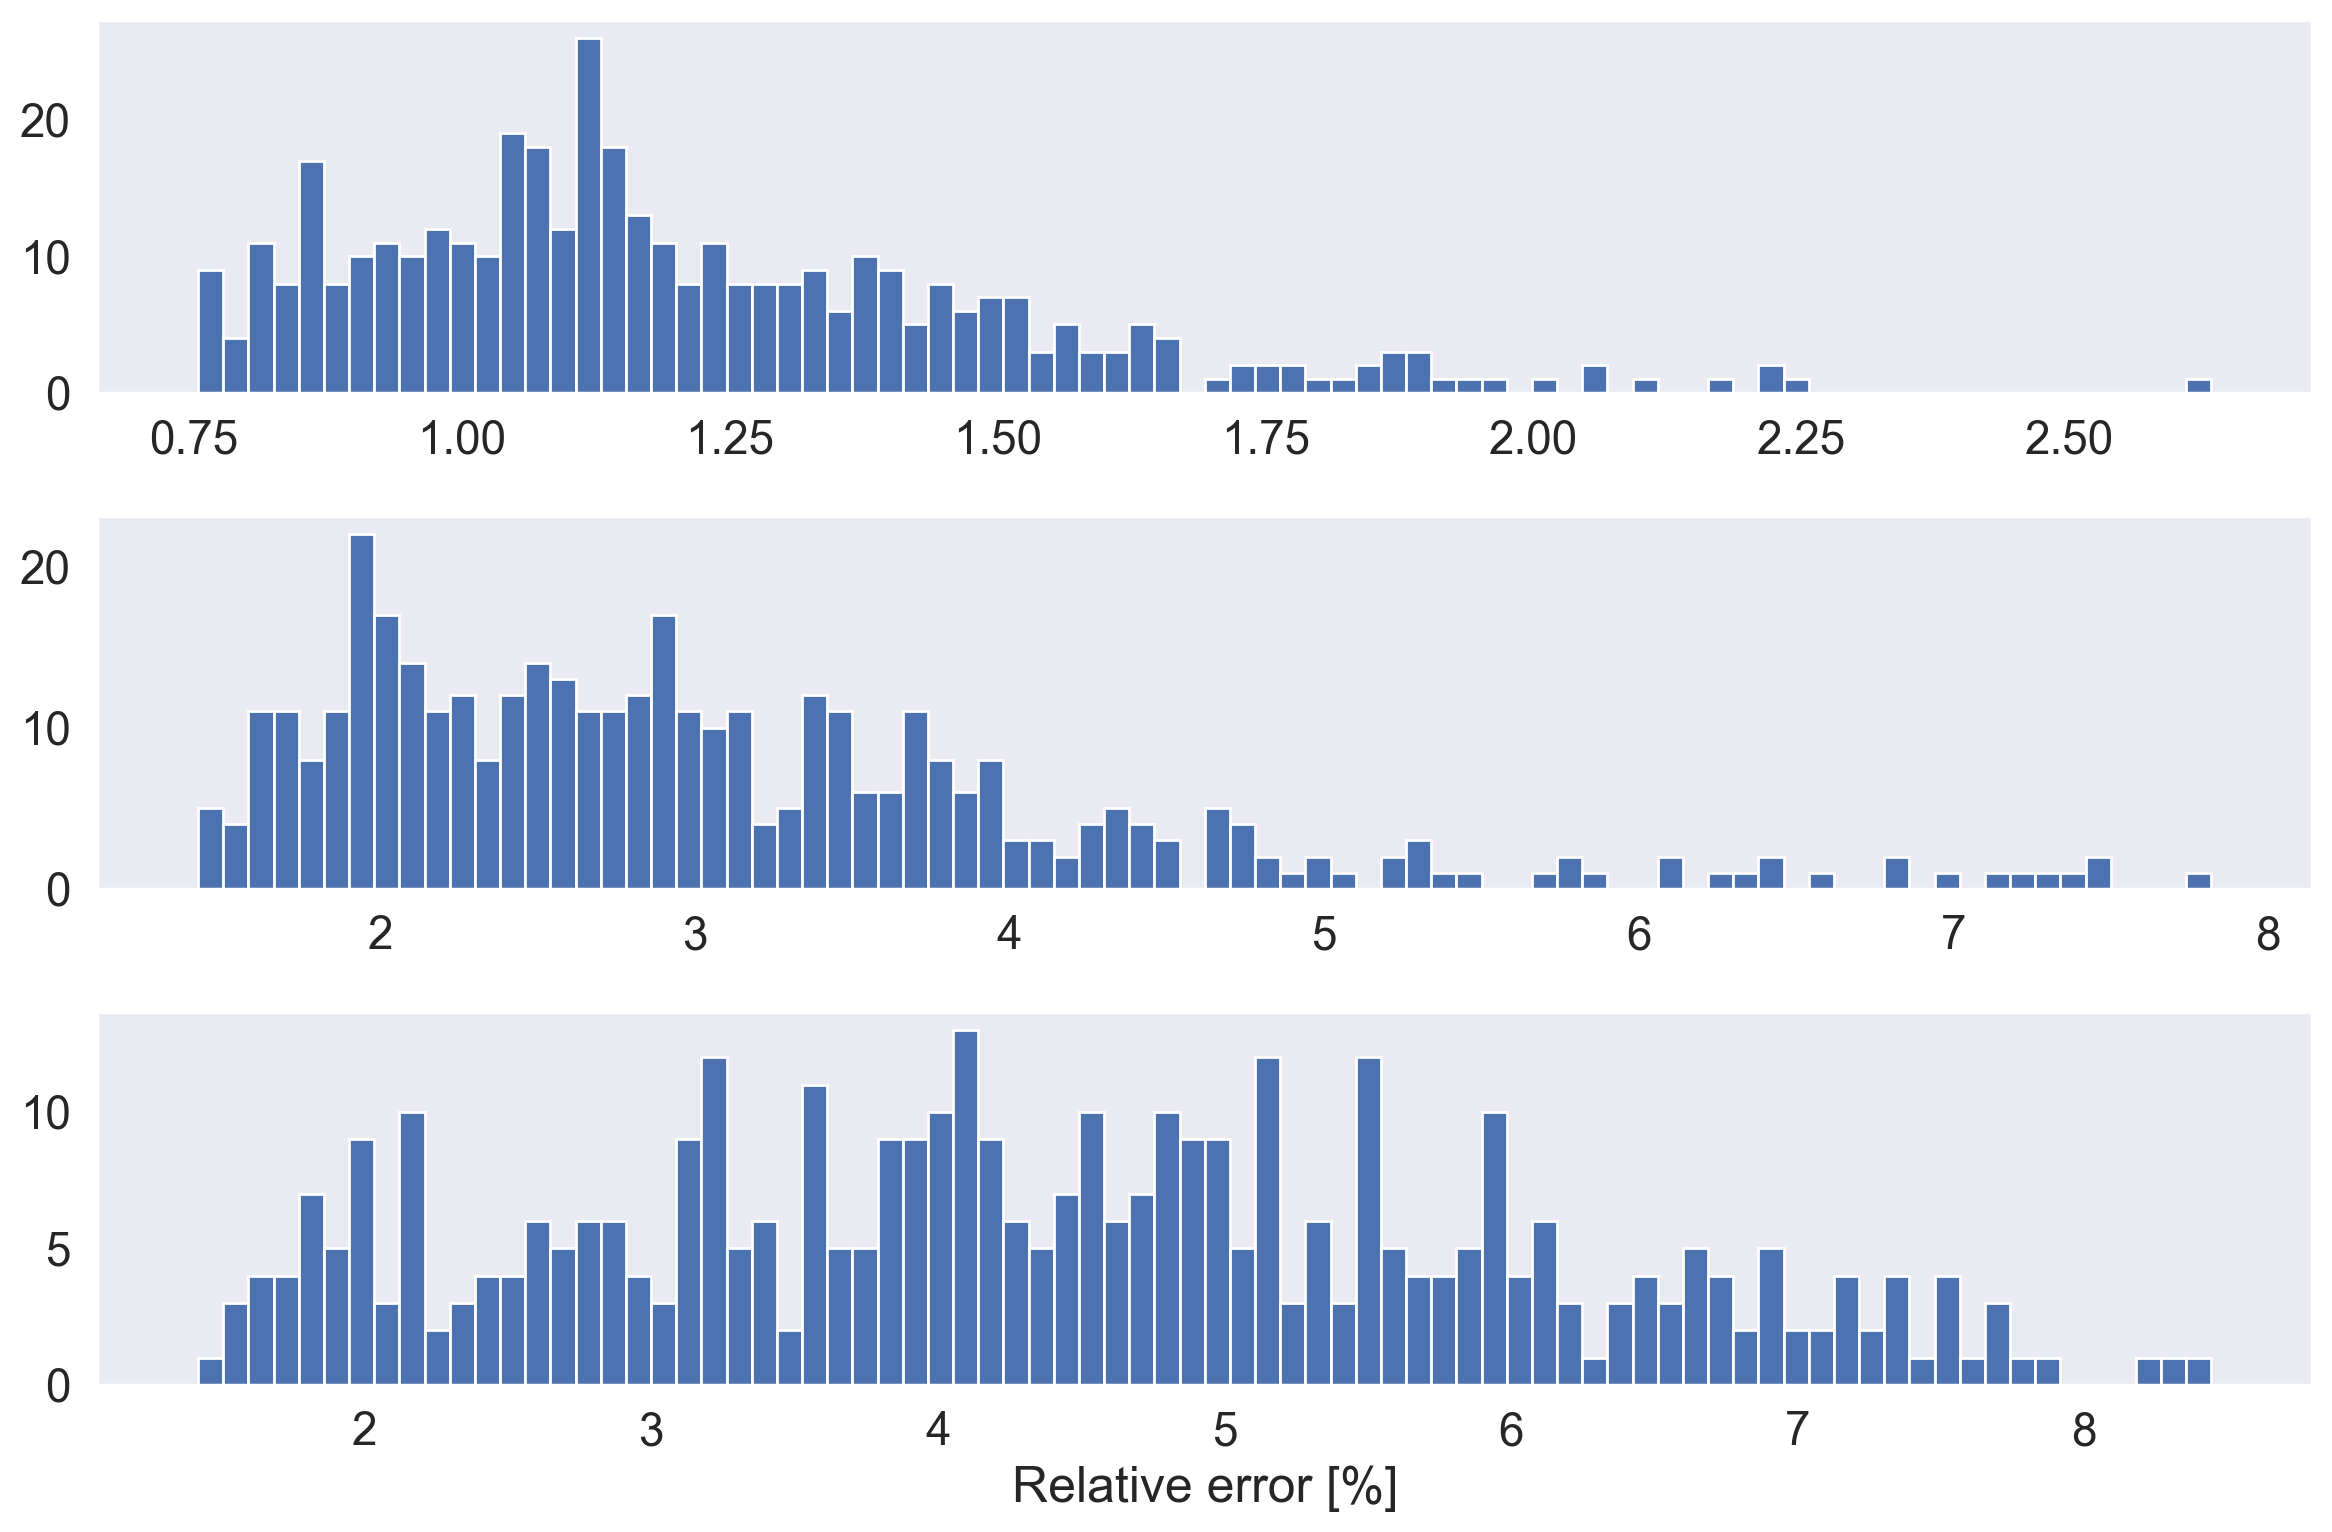

In [18]:
fig, ax = plt.subplots(3,1)
ax[0].hist(stars_rel_pix_rmse_8,bins=80)
ax[1].hist(stars_rel_pix_rmse_16,bins=80)
ax[2].hist(stars_rel_pix_rmse_32,bins=80)
plt.xlabel('Relative error [%]')
plt.show()

In [19]:
dataset_folder = '../../../output/interp_SEDs/'
dataset_path = dataset_folder + 'test_Euclid_res_id_009_8_bins.npy'

test_dataset = np.load(dataset_path, allow_pickle=True)[()]

In [20]:
test_positions = test_dataset['positions']

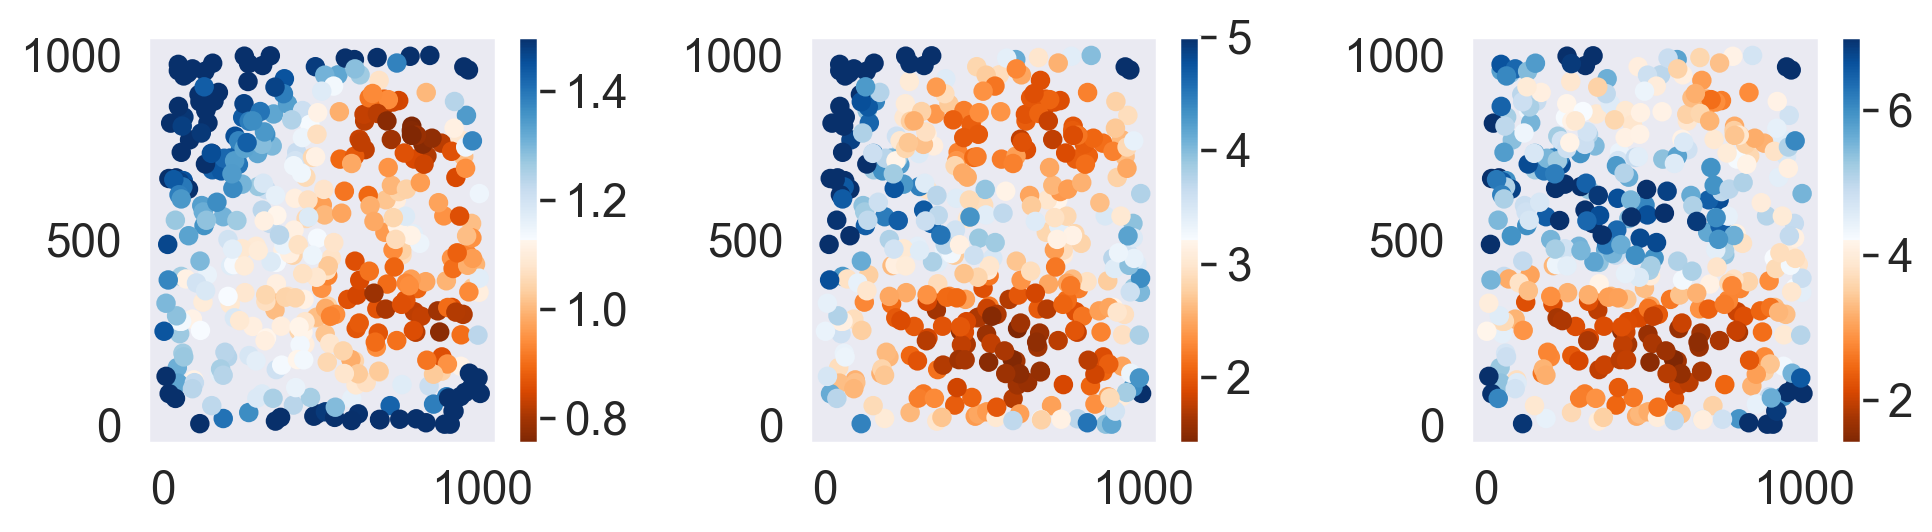

In [32]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
plt.rcParams['axes.grid'] = False
im = ax[0].scatter(test_positions[:,0], test_positions[:,1],c=stars_rel_pix_rmse_8,cmap=newcmp,vmax=1.5)
plt.colorbar(im, ax=ax[0])
im = ax[1].scatter(test_positions[:,0], test_positions[:,1],c=stars_rel_pix_rmse_16,cmap=newcmp,vmax=5)
plt.colorbar(im, ax=ax[1])
im = ax[2].scatter(test_positions[:,0], test_positions[:,1],c=stars_rel_pix_rmse_32,cmap=newcmp,vmax=7)
plt.colorbar(im, ax=ax[2])
plt.show()

In [36]:
print('Mean error:')
print(' -> 8 bins  : ',np.mean(stars_rel_pix_rmse_8))
print(' -> 16 bins : ',np.mean(stars_rel_pix_rmse_16))
print(' -> 32 bins : ',np.mean(stars_rel_pix_rmse_32))

Mean error:
 -> 8 bins  :  1.204198
 -> 16 bins :  3.0664117
 -> 32 bins :  4.3991175
